In [1]:
import platform
print('python: '+platform.python_version())
import numpy as np
print('numpy: '+np.__version__)
import matplotlib
print('matplotlib: '+matplotlib.__version__)
import matplotlib.pyplot as plt
import pandas as pd

python: 3.8.12
numpy: 1.22.3
matplotlib: 3.5.1


In [2]:
import seaborn as sns
import math
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,SimpleRNN,BatchNormalization,LSTM,Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Dropout,Activation,MaxPooling2D,Flatten
import numpy as np
import sys
import pylab
import itertools
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Cargar los datasets

In [3]:
Datrain=np.load('Datatrain.npy')
Datest=np.load('Datatest.npy')
labeltr=np.load('labeltr.npy')
labelte=np.load('labelte.npy')

In [4]:
print(Datrain.shape)
print(Datest.shape)

(30000, 40, 40)
(10000, 40, 40)


Arquitectura

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(40, 40,1)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='sigmoid'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='sigmoid'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
  
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [6]:
model.compile(optimizer='adam',
               loss='mse',
               metrics=['accuracy'])

Entrenar la CNN

In [7]:
history = model.fit(Datrain, labeltr, batch_size = 10, epochs = 10)

Epoch 1/10
3000/3000 [==============================] - 60s 20ms/step - loss: 0.1752 - accuracy: 0.7428
Epoch 2/10
3000/3000 [==============================] - 64s 21ms/step - loss: 0.1348 - accuracy: 0.8208
Epoch 3/10
3000/3000 [==============================] - 59s 20ms/step - loss: 0.1265 - accuracy: 0.8330
Epoch 4/10
3000/3000 [==============================] - 58s 19ms/step - loss: 0.1215 - accuracy: 0.8392
Epoch 5/10
3000/3000 [==============================] - 58s 19ms/step - loss: 0.1175 - accuracy: 0.8433
Epoch 6/10
3000/3000 [==============================] - 59s 20ms/step - loss: 0.1155 - accuracy: 0.8462
Epoch 7/10
3000/3000 [==============================] - 60s 20ms/step - loss: 0.1135 - accuracy: 0.8489
Epoch 8/10
3000/3000 [==============================] - 61s 20ms/step - loss: 0.1103 - accuracy: 0.8537
Epoch 9/10
3000/3000 [==============================] - 61s 20ms/step - loss: 0.1082 - accuracy: 0.8568
Epoch 10/10
3000/3000 [==============================] - 62s 21m

In [8]:
predictionL=model.predict(x=Datest, batch_size=10,verbose=0)

predictionL = np.around(predictionL) 

In [9]:
print(predictionL)
print(labelte)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]
[0 0 0 ... 1 1 1]


In [10]:
test_loss, test_acc = model.evaluate(Datest, labelte)
print('Acurracy ', test_acc)

313/313 [==============================] - 6s 19ms/step - loss: 0.1150 - accuracy: 0.8442
Acurracy  0.8442000150680542


Matriz de confusión

Confusion matrix, without normalization
[[4277  743]
 [ 815 4165]]


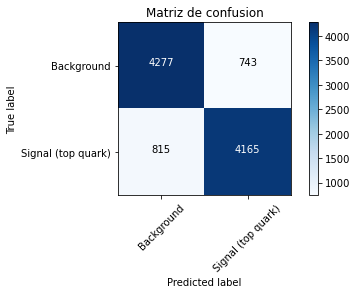

In [11]:
cm=confusion_matrix(y_true=labelte,y_pred=predictionL)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_labels=['Background', 'Signal (top quark)']    
plot_confusion_matrix(cm=cm,classes=cm_labels,title='Matriz de confusion')

In [12]:
model = Sequential()
model.add(Conv2D(128, (4, 4), input_shape=(40, 40,1)))
model.add(Conv2D(64, (4, 4),activation='relu', padding='valid'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (4, 4),activation='relu', padding='valid'))
model.add(Conv2D(64, (4, 4),activation='relu', padding='valid'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
  
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 37, 37, 128)       2176      
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 64)        131136    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        65600     
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        65600     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [13]:
model.compile(optimizer='adam',
               loss='mse',
               metrics=['accuracy'])

In [14]:
history = model.fit(Datrain, labeltr, batch_size = 10, epochs = 10)

Epoch 1/10
3000/3000 [==============================] - 662s 220ms/step - loss: 0.1686 - accuracy: 0.7552
Epoch 2/10
3000/3000 [==============================] - 657s 219ms/step - loss: 0.1320 - accuracy: 0.8200
Epoch 3/10
3000/3000 [==============================] - 717s 239ms/step - loss: 0.1250 - accuracy: 0.8291
Epoch 4/10
3000/3000 [==============================] - 678s 226ms/step - loss: 0.1203 - accuracy: 0.8366
Epoch 5/10
3000/3000 [==============================] - 701s 234ms/step - loss: 0.1172 - accuracy: 0.8406
Epoch 6/10
3000/3000 [==============================] - 730s 243ms/step - loss: 0.1142 - accuracy: 0.8444
Epoch 7/10
3000/3000 [==============================] - 727s 242ms/step - loss: 0.1120 - accuracy: 0.8487
Epoch 8/10
3000/3000 [==============================] - 721s 240ms/step - loss: 0.1099 - accuracy: 0.8501
Epoch 9/10
3000/3000 [==============================] - 735s 245ms/step - loss: 0.1094 - accuracy: 0.8518
Epoch 10/10
3000/3000 [=======================

In [15]:
predictionL=model.predict(x=Datest, batch_size=10,verbose=0)

predictionL = np.around(predictionL) 

In [16]:
print(predictionL)
print(labelte)

[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]
[0 0 0 ... 1 1 1]


In [17]:
test_loss, test_acc = model.evaluate(Datest, labelte)
print('Acurracy ', test_acc)

313/313 [==============================] - 56s 176ms/step - loss: 0.1130 - accuracy: 0.8465
Acurracy  0.8464999794960022


Confusion matrix, without normalization
[[4224  796]
 [ 739 4241]]


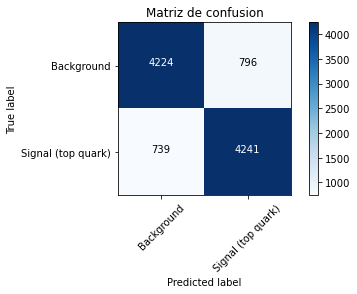

In [18]:
cm=confusion_matrix(y_true=labelte,y_pred=predictionL)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_labels=['Background', 'Signal (top quark)']    
plot_confusion_matrix(cm=cm,classes=cm_labels,title='Matriz de confusion')